# Welcome to my Keras practice to classify cars

##### Importing libraries

In [23]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
import numpy as np

##### Importing the data

In [24]:
df = pd.read_csv('C:/Users/Nicolas/Documents/Scraping/thecarconnection/raw_data_imputed.csv', 
                 index_col=0).sample(frac=1, random_state=42).reset_index(drop=True)

In [25]:
df.head()

,Make,Model,MSRP,Style Name,Drivetrain,Passenger Capacity,Passenger Doors,Body Style,EPA Classification,Base Curb Weight (lbs),...,Displacement (cc),Rear Tire Width,Front Tire Width,Rear Wheel Size,Front Wheel Size,Tire Rating,Tire Width Ratio,Wheel Size Ratio,Tire Ratio,Year
0,Ford,Expedition,62295.0,4WD 4dr King Ranch,Four Wheel Drive,8.0,4,Sport Utility,Small Sport Utility Vehicles 4WD,3905.44,...,213.0,275.0,275.0,20.0,20.0,S,1.000000,1.0,5.0,2016.0
1,Subaru,Crosstrek,29995.0,Touring CVT,All Wheel Drive,5.0,4,Sport Utility,Small Sport Utility Vehicles 4WD,3495.00,...,122.0,225.0,225.0,17.0,17.0,H,1.000000,1.0,5.0,2016.0
2,Porsche,911,161800.0,Turbo Coupe,All Wheel Drive,4.0,2,2dr Car,Minicompact Cars,3516.00,...,232.0,305.0,245.0,20.0,20.0,Y,1.244898,1.0,3.0,2018.0
3,Volvo,XC90,47950.0,T5 AWD 5-Passenger Momentum,All Wheel Drive,5.0,4,Sport Utility,Small Sport Utility Vehicles 4WD,4394.00,...,120.0,235.0,235.0,18.0,18.0,H,1.000000,1.0,6.0,2017.0
4,Mercedes-Benz,SL Class,110800.0,SL 550,Rear Wheel Drive,2.0,2,Convertible,Two-Seaters,3959.00,...,285.0,285.0,255.0,19.0,19.0,Y,1.117647,1.0,3.0,2017.0


## Preprocessing

##### Making sure the data is balanced

In [26]:
df['EPA Classification'].value_counts().head()

Small Sport Utility Vehicles 4WD    1650
Mid-Size Cars                       1177
Compact Cars                        1029
Small Sport Utility Vehicles 2WD     659
Large Cars                           598
Name: EPA Classification, dtype: int64

In [27]:
small_utility_awd = df.loc[df['EPA Classification'] == 'Small Sport Utility Vehicles 4WD'].sample(n=1000)
midsized_car = df.loc[df['EPA Classification'] == 'Mid-Size Cars'].sample(n=1000)
compact_car = df.loc[df['EPA Classification'] == 'Compact Cars'].sample(n=1000)

In [28]:
df = pd.concat([small_utility_awd, compact_car, midsized_car], 
                axis=0, sort=False).sample(frac=1)

##### Double checking the balanced data

In [29]:
df['EPA Classification'].value_counts().head()

Small Sport Utility Vehicles 4WD    1000
Mid-Size Cars                       1000
Compact Cars                        1000
Name: EPA Classification, dtype: int64

Text(0.5, 1.0, 'Pie Chart of Car Types')

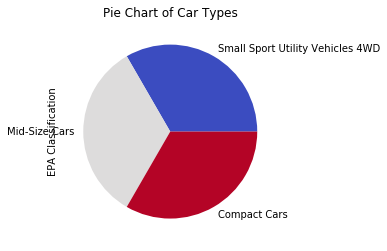

In [30]:
df['EPA Classification'].value_counts().head().plot(kind='pie', cmap='coolwarm')
plt.title('Pie Chart of Car Types')

##### Separating the `x` and `y`

In [14]:
x = df.loc[:, ['MSRP', 'Drivetrain', 'Passenger Capacity', 'Passenger Doors', 
               'Width, Max w/o mirrors (in)', 'Track Width, Rear (in)',
               'Height, Overall (in)', 'Wheelbase (in)', 'Track Width, Front (in)',
               'Fuel Tank Capacity, Approx (gal)', 'EPA Fuel Economy Est - City (MPG)',
               'EPA Fuel Economy Est - Hwy (MPG)', 'Gears', 'Net Horsepower', 'Net Horsepower RPM', 
               'Net Torque', 'Net Torque RPM', 'Cylinders', 'Engine Configuration', 'Engine Class',
               'Displacement (L)', 'Displacement (cc)', 'Rear Tire Width',
               'Front Tire Width', 'Rear Wheel Size', 'Front Wheel Size',
               'Tire Rating', 'Tire Width Ratio', 'Wheel Size Ratio', 'Tire Ratio']]

In [15]:
y = OrdinalEncoder().fit_transform(np.array(df['EPA Classification']).reshape(-1, 1))

In [16]:
specs_to_dummies = ['Drivetrain', 'Engine Configuration', 'Engine Class', 'Tire Rating']

for item in specs_to_dummies:
    dummies = pd.get_dummies(x[item], prefix_sep=': ', prefix=item)
    x = x.drop(item, axis=1)
    x = pd.concat([x, dummies], sort=False, axis=1)
x = x.reset_index(drop=True)

##### Transforming the data into numbers between 0 and 1

In [17]:
scaler = MinMaxScaler(feature_range=(0, 1))
x = scaler.fit_transform(x)

C:\Users\Nicolas\Miniconda3\envs\tfenv\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


## Building and training the model

##### Building

In [31]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(2, input_shape=(52,)))
model.add(tf.keras.layers.Dense(200, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(200, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(3, activation=tf.nn.softmax))

##### Compiling

In [19]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

##### Training

In [20]:
model.fit(x, y, epochs=10, batch_size=10, validation_split=0.1)

Train on 2700 samples, validate on 300 samples
Epoch 1/10
2700/2700 [==============================] - 2s 561us/sample - loss: 0.8035 - acc: 0.5956 - val_loss: 0.5366 - val_acc: 0.7367
Epoch 2/10
2700/2700 [==============================] - 1s 347us/sample - loss: 0.4776 - acc: 0.7663 - val_loss: 0.4408 - val_acc: 0.8067
Epoch 3/10
2700/2700 [==============================] - 1s 307us/sample - loss: 0.3908 - acc: 0.8215 - val_loss: 0.3565 - val_acc: 0.8633
Epoch 4/10
2700/2700 [==============================] - 1s 243us/sample - loss: 0.3258 - acc: 0.8567 - val_loss: 0.3230 - val_acc: 0.8700
Epoch 5/10
2700/2700 [==============================] - 1s 267us/sample - loss: 0.2884 - acc: 0.8844 - val_loss: 0.3096 - val_acc: 0.8867
Epoch 6/10
2700/2700 [==============================] - 1s 239us/sample - loss: 0.2723 - acc: 0.8837 - val_loss: 0.2959 - val_acc: 0.8967
Epoch 7/10
2700/2700 [==============================] - 1s 241us/sample - loss: 0.2512 - acc: 0.8941 - val_loss: 0.3007 - val

## Final score and summary

In [22]:
# Epoch 92/100
# 2700/2700 [==============================] - 1s 263us/sample
# loss: 0.0812 - acc: 0.9685 - val_loss: 0.0814 - val_acc: 0.9767

Highest accuracy in the validation sample: 97.67%, loss of 8.12%

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 106       
_________________________________________________________________
dense_1 (Dense)              (None, 200)               600       
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 603       
Total params: 41,509
Trainable params: 41,509
Non-trainable params: 0
_________________________________________________________________
